In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import os, shutil
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:

train_path = "/home/stipe/Desktop/JP_files/combine_datasets/train"
validation_path = "/home/stipe/Desktop/JP_files/combine_datasets/validation"
test_path = "/home/stipe/Desktop/JP_files/combine_datasets/test"


In [ ]:
from tensorflow.keras.applications import MobileNetV2

# Load the MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the initial layers
for layer in base_model.layers:
    layer.trainable = False


9406464/9406464 [==============================] - 1s 0us/step


In [ ]:

# 1. Train Set
train_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
train_image_generator = train_gen.flow_from_directory(
                                            train_path,
                                            target_size=(224, 224),
                                            batch_size=32)

# 2. Validation Set
val_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
val_image_generator = val_gen.flow_from_directory(
                                            validation_path,
                                            target_size=(224, 224),
                                            batch_size=32)

# 3. Test Set
test_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
test_image_generator = test_gen.flow_from_directory(
                                            test_path,
                                            target_size=(224, 224),
                                            batch_size=32)

In [ ]:
train_image_generator.class_indices.items()

dict_items([('apple', 0), ('banana', 1), ('beetroot', 2), ('bell pepper', 3), ('cabbage', 4), ('capsicum', 5), ('carrot', 6), ('cauliflower', 7), ('chilli pepper', 8), ('corn', 9), ('cucumber', 10), ('eggplant', 11), ('garlic', 12), ('ginger', 13), ('grapes', 14), ('jalepeno', 15), ('kiwi', 16), ('lemon', 17), ('lettuce', 18), ('mango', 19), ('onion', 20), ('orange', 21), ('paprika', 22), ('pear', 23), ('peas', 24), ('pineapple', 25), ('pomegranate', 26), ('potato', 27), ('raddish', 28), ('soy beans', 29), ('spinach', 30), ('sweetcorn', 31), ('sweetpotato', 32), ('tomato', 33), ('turnip', 34), ('watermelon', 35)])

In [ ]:
# Print the class encodings done by the generators
class_map = dict([(v, k) for k, v in train_image_generator.class_indices.items()])
print(class_map)

{0: 'apple', 1: 'banana', 2: 'beetroot', 3: 'bell pepper', 4: 'cabbage', 5: 'capsicum', 6: 'carrot', 7: 'cauliflower', 8: 'chilli pepper', 9: 'corn', 10: 'cucumber', 11: 'eggplant', 12: 'garlic', 13: 'ginger', 14: 'grapes', 15: 'jalepeno', 16: 'kiwi', 17: 'lemon', 18: 'lettuce', 19: 'mango', 20: 'onion', 21: 'orange', 22: 'paprika', 23: 'pear', 24: 'peas', 25: 'pineapple', 26: 'pomegranate', 27: 'potato', 28: 'raddish', 29: 'soy beans', 30: 'spinach', 31: 'sweetcorn', 32: 'sweetpotato', 33: 'tomato', 34: 'turnip', 35: 'watermelon'}


In [ ]:
class_map

{0: 'apple',
 1: 'banana',
 2: 'beetroot',
 3: 'bell pepper',
 4: 'cabbage',
 5: 'capsicum',
 6: 'carrot',
 7: 'cauliflower',
 8: 'chilli pepper',
 9: 'corn',
 10: 'cucumber',
 11: 'eggplant',
 12: 'garlic',
 13: 'ginger',
 14: 'grapes',
 15: 'jalepeno',
 16: 'kiwi',
 17: 'lemon',
 18: 'lettuce',
 19: 'mango',
 20: 'onion',
 21: 'orange',
 22: 'paprika',
 23: 'pear',
 24: 'peas',
 25: 'pineapple',
 26: 'pomegranate',
 27: 'potato',
 28: 'raddish',
 29: 'soy beans',
 30: 'spinach',
 31: 'sweetcorn',
 32: 'sweetpotato',
 33: 'tomato',
 34: 'turnip',
 35: 'watermelon'}

In [ ]:
num_classes = 36

In [ ]:
# Add a new classification layer
model_mobilenetv2 = base_model.output
pool = tf.keras.layers.GlobalAveragePooling2D()(model_mobilenetv2)
dense_1 = tf.keras.layers.Dense(256, activation='relu')(pool)
predictions = tf.keras.layers.Dense(num_classes, activation='softmax')(dense_1)

# Create the transfer learning model
model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(train_image_generator, epochs=10, validation_data=val_image_generator)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_image_generator)


Epoch 1/10
98/98 [==============================] - 487s 5s/step - loss: 1.3455 - accuracy: 0.6340 - val_loss: 0.3316 - val_accuracy: 0.8974
Epoch 2/10
98/98 [==============================] - 333s 3s/step - loss: 0.4404 - accuracy: 0.8600 - val_loss: 0.1825 - val_accuracy: 0.9345
Epoch 3/10
98/98 [==============================] - 336s 3s/step - loss: 0.2407 - accuracy: 0.9287 - val_loss: 0.2004 - val_accuracy: 0.9402
Epoch 4/10
98/98 [==============================] - 321s 3s/step - loss: 0.1536 - accuracy: 0.9567 - val_loss: 0.1520 - val_accuracy: 0.9430
Epoch 5/10
98/98 [==============================] - 341s 3s/step - loss: 0.1025 - accuracy: 0.9721 - val_loss: 0.1413 - val_accuracy: 0.9630
Epoch 6/10
98/98 [==============================] - 334s 3s/step - loss: 0.0752 - accuracy: 0.9827 - val_loss: 0.1424 - val_accuracy: 0.9715
Epoch 7/10
98/98 [==============================] - 329s 3s/step - loss: 0.0649 - accuracy: 0.9836 - val_loss: 0.1191 - val_accuracy: 0.9715
Epoch 8/10
98

In [ ]:
# import the model from drive

model = tf.keras.models.load_model('/content/drive/MyDrive/Fruit_vegetable_models/fruit_veg_img_trnsfr_lrng_MobileNetV2.h5')

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_image_generator)

12/12 [==============================] - 40s 3s/step - loss: 0.1016 - accuracy: 0.9749


In [ ]:
test_image_path = "/content/drive/MyDrive/Vegetable Images/test/Cucumber/1010.jpg"

test_img = load_img(test_image_path, target_size=(224, 224))
test_img_arr = img_to_array(test_img)/255.0
test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))

# 2. Make Predictions
predicted_label = np.argmax(model.predict(test_img_input))
predicted_label

1/1 [==============================] - 1s 975ms/step


24

1/1 [==============================] - 0s 63ms/step


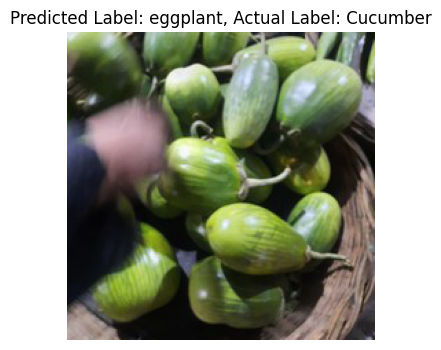

In [ ]:
# Testing the Model
test_image_path = "/content/drive/MyDrive/Vegetable Images/test/Brinjal/0944.jpg"

def generate_predictions(test_image_path, actual_label):

    # 1. Load and preprocess the image
    test_img = load_img(test_image_path, target_size=(224, 224))
    test_img_arr = img_to_array(test_img)/255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))

    # 2. Make Predictions
    predicted_label = np.argmax(model.predict(test_img_input))
    predicted_vegetable = class_map[predicted_label]
    plt.figure(figsize=(4, 4))
    plt.imshow(test_img_arr)
    plt.title("Predicted Label: {}, Actual Label: {}".format(predicted_vegetable, actual_label))
    plt.grid()
    plt.axis('off')
    plt.show()

# call the function
generate_predictions(test_image_path, actual_label='brinjal')

In [ ]:
# Load the image and preprocess it
img_path = '/content/drive/MyDrive/Fruits and Vegetables/test/chilli pepper/Image_4.jpg'
img = load_img(img_path, target_size=(224, 224))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

# Use the predict() method to classify the image
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)
#predicted_label = class_map[predicted_class]

# Print the predicted class and its probability
print("Predicted class:", predicted_class)
print("Probability:", prediction[0][predicted_class])
print("class_name:", class_map[predicted_class])

1/1 [==============================] - 0s 66ms/step
Predicted class: 8
Probability: 0.9187588
class_name: chilli pepper


In [ ]:
keras_model_name = 'tf_model_fruit_vegetable_img_trnsfr_lrng_MobileNetV2.h5'
model.save(keras_model_name)
model.save('/content/drive/MyDrive/Fruit_vegetable_models/fruit_veg_img_trnsfr_lrng_MobileNetV2.h5')

In [ ]:
TF_LITE_MODEL_FILE_NAME = 'fruit_veg_img_trnsfr_lrng.tflite'

In [ ]:
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model_fruit_veg = tf_lite_converter.convert()

In [ ]:
tflite_fruit_veg_trnsfr_lrng = TF_LITE_MODEL_FILE_NAME
open(tflite_fruit_veg_trnsfr_lrng,'wb').write(tflite_model_fruit_veg)

10207520